## Machine learning - Portfolio-Exam

### Submitted To : <b> Prof. Dr. Stephan Doerfel </b>

### Submitted By: <b> Mooli Nithin Kumar Reddy  </b>

The dataset  File is also included zip folder submitted with this notebook

## Task 1 – Story

<div class="alert alert-block alert-info">

I am a data scientist working for a healthcare organization called HealthLife, which operates a network of hospitals and clinics. 

HealthLife is committed to improving patient outcomes through advanced data analytics and personalized medicine.

Chronic Kidney Disease (CKD) is a significant health issue affecting millions of people worldwide, leading to severe health complications and high treatment costs if not detected early.

HealthLife has initiated a project aimed at the early detection of CKD to improve patient outcomes and reduce long-term treatment costs.

As part of this initiative, HealthLife has collected a comprehensive dataset containing various medical features of patients, such as age, blood pressure, specific blood markers, and lifestyle factors.

The ultimate goal is to enable early detection and intervention, leading to better patient outcomes and reduced healthcare costs.

The goal is to use this dataset to build a predictive model that can classify patients as having CKD or not.

This helps to find weather the person is suffering from chronic kidney disease or not.
    
</div>

## Task 2- The Data

 Importing the required libraries for preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 loading the dataset and storing it in the variable called df

In [2]:
df=pd.read_csv(r"C:\Users\nithi\OneDrive\Desktop\kidney_disease.csv")

In [3]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


## features

Age(numerical) - age in years
 
Blood Pressure(numerical) - bp in mm/Hg

Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)

Albumin(nominal) - al - (0,1,2,3,4,5)

Sugar(nominal) - su - (0,1,2,3,4,5)

Red Blood Cells(nominal) - rbc - (normal,abnormal)

Pus Cell (nominal) - pc - (normal,abnormal)

Pus Cell clumps(nominal) - pcc - (present,notpresent)

Bacteria(nominal) - ba - (present,notpresent)

Blood Glucose Random(numerical) - bgr in mgs/dl

Blood Urea(numerical) -bu in mgs/dl

Serum Creatinine(numerical) - sc in mgs/dl

Sodium(numerical) - sod in mEq/L

Potassium(numerical) - pot in mEq/L

Hemoglobin(numerical) - hemo in gms

Packed Cell Volume(numerical)

White Blood Cell Count(numerical) - wc in cells/cumm

Red Blood Cell Count(numerical) - rc in millions/cmm

Hypertension(nominal) - htn - (yes,no)

Diabetes Mellitus(nominal) - dm - (yes,no)

Coronary Artery Disease(nominal) - cad - (yes,no)

Appetite(nominal) - appet - (good,poor)

Pedal Edema(nominal) - pe - (yes,no)

Anemia(nominal) - ane - (yes,no)

Class (nominal)- class - (ckd,notckd)

## Task 3 – IDA


 Statistical properties of the features

In [4]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


 Presenting the datatypes of the features

In [5]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

providing the info of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

 A histogram is a graphical representation that organizes a group of data points into user-specified ranges

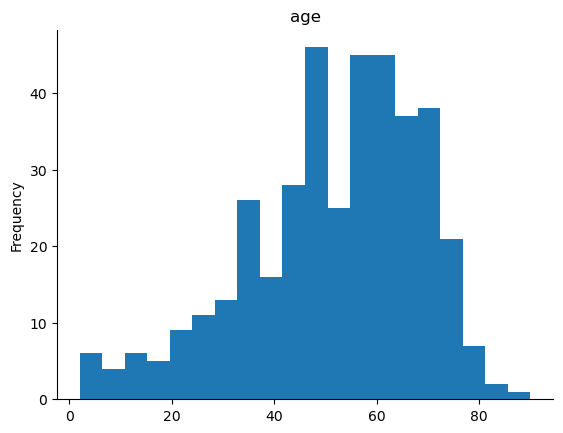

In [7]:
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

 This histogram will show how the 'age' values are distributed across different ranges.
    
 Each bin represents a range of ages, and the height of each bar represents the number of observations within that age range

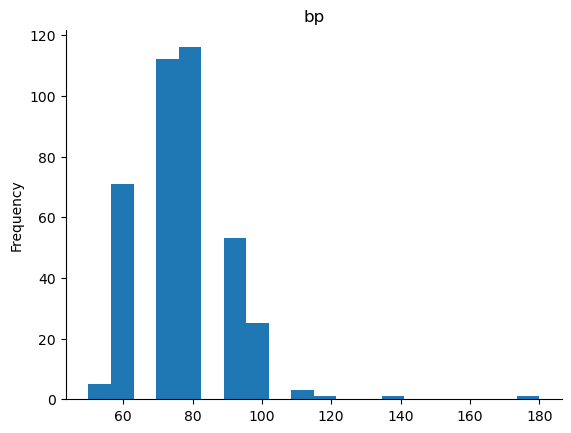

In [8]:
df['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

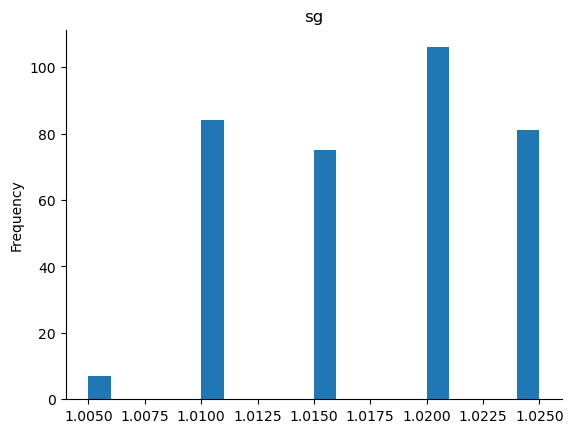

In [9]:
df['sg'].plot(kind='hist', bins=20, title='sg')
plt.gca().spines[['top', 'right',]].set_visible(False)

 Same for bp and sg features using the histplot

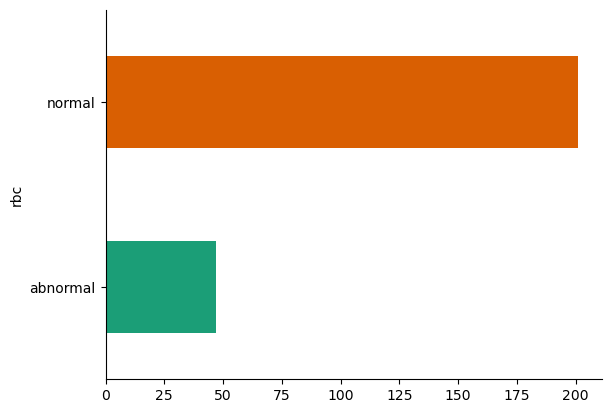

In [10]:
df.groupby('rbc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

 This horizontal bar chart displays the counts of each unique value in the rbc column
    
  same for the colums of pc and pcc

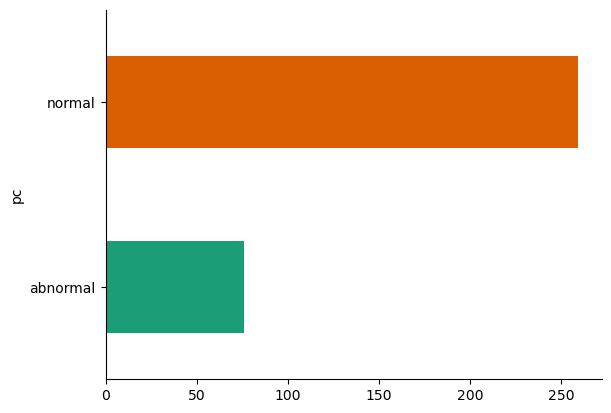

In [11]:
df.groupby('pc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

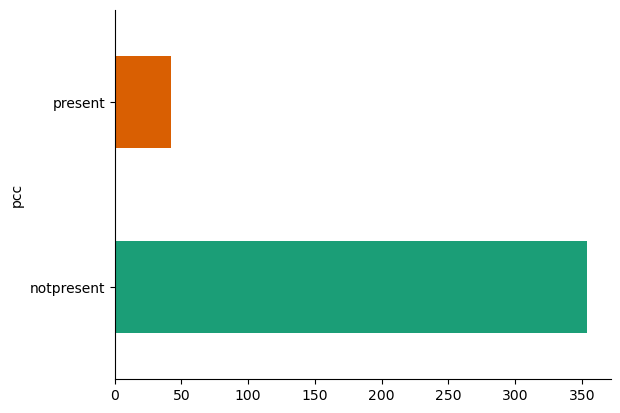

In [12]:
df.groupby('pcc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

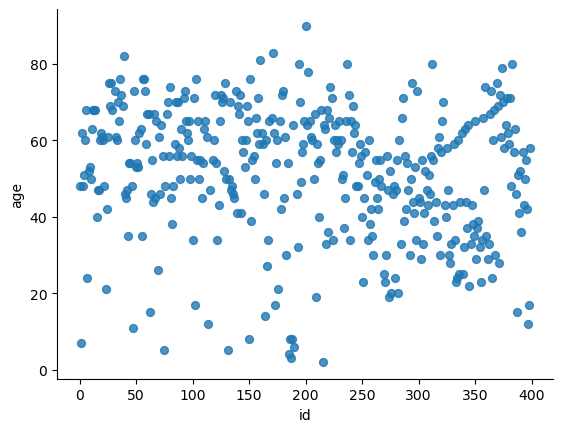

In [13]:
df.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

 This scatter plot shows the relationship between the id and age columns.
    
 By plotting id on the xaxis and age on the yaxis, you can observe how age values are distributed across different ids.

In [14]:
## Storing required features in  variable l and checking their values
l=['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']
df[l]

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no


 pcv,wc,rc are numerical columns which are identified as objects`

## Task 5-EDA and Preprocessing

 Checking if there are any null values

In [15]:
df.isnull().sum() 

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

 We can see there are null values present in the dataset so clearing the null values will be useful for the project

 Filing all the null values with the mean of their total values of that specific column

In [16]:
for i in df.columns:
  if df[i].dtype!='object':
    df[i].fillna(np.mean(df[i]),inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


 we can see there are some more null values 

In [17]:
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

 removing the unwanted values from that columns

In [18]:
df['pcv'].mode()

0    41
1    52
Name: pcv, dtype: object

In [19]:
df['pcv'].value_counts()

pcv
41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: count, dtype: int64

 we can there are values which are in different of the other values removing those values from that feature and storing in the dataset

In [20]:
df=df[(df['pcv']!='\t43')&(df['pcv']!='\t?')]

In [21]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [22]:
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               151
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                104
rc                129
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [23]:
pcv=df['pcv']

In [24]:
pcv

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: pcv, Length: 398, dtype: object

In [25]:
pcv=pcv.dropna()

In [26]:
pcv=pcv.astype('int64')
## calculating the mean of the pcv to fill null values
pcv.mean()

38.8719512195122

In [27]:
## filling all the null values with the mean value 
df['pcv']=df['pcv'].fillna(39)

C:\Users\nithi\AppData\Local\Temp\ipykernel_15956\917438765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pcv']=df['pcv'].fillna(39)


In [28]:
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               151
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                104
rc                129
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [29]:
df=df[(df['wc']!='\t43')&(df['wc']!='\t?')]

In [30]:
wc=df['wc']
wc=wc.dropna()
wc=wc.astype('int64')
## calculating the mean
wc.mean()

8418.088737201366

 filling all the null values with the mean value 

In [31]:
df['wc']=df['wc'].fillna(8420)

C:\Users\nithi\AppData\Local\Temp\ipykernel_15956\1902287702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wc']=df['wc'].fillna(8420)


In [32]:
df=df[(df['rc']!='\t43')&(df['rc']!='\t?')]

In [33]:
rc=df['rc']
rc=rc.dropna()
rc=rc.astype('float')
## calculating the mean
rc.mean()

4.705597014925373

 checking the values of rc how many decimal points it has

In [34]:
rc.value_counts()

rc
5.2    17
4.5    16
4.9    14
4.7    11
5.0    10
3.9    10
4.8    10
4.6     9
3.4     9
5.9     8
3.7     8
6.1     8
5.5     8
5.4     7
5.3     7
5.8     7
3.8     7
4.2     6
4.3     6
4.0     6
5.6     6
5.1     5
6.2     5
6.4     5
5.7     5
6.5     5
4.1     5
4.4     5
3.2     5
6.0     4
3.6     4
6.3     4
3.3     3
3.0     3
3.5     3
2.6     2
2.8     2
2.9     2
2.5     2
2.7     2
2.1     2
3.1     2
2.3     1
2.4     1
8.0     1
Name: count, dtype: int64

 filling all the null values with the mean value with 2 decimal points

In [35]:
df['rc']=df['rc'].fillna(4.7)

In [36]:
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               149
pc                 64
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [37]:
df['rbc'].value_counts()

rbc
normal      201
abnormal     46
Name: count, dtype: int64

 We can see that rbc has more values with normal value 
    
 filling all the null values with the normal

In [38]:
df['rbc'].fillna('normal',inplace=True)

In [39]:
df['pc'].value_counts()

pc
normal      257
abnormal     75
Name: count, dtype: int64

 We can see that pc has more values with normal value 
    
 filling all the null values with the normal

In [40]:
df['pc'].fillna('normal',inplace=True)

In [41]:
df['pcc'].value_counts()

pcc
notpresent    350
present        42
Name: count, dtype: int64

 We can see that pcc has more values with notpresent value 
    
 filling all the null values with the notpresent

In [42]:
df['pcc'].fillna("notpresent",inplace=True)

In [43]:
df['ba'].value_counts()

ba
notpresent    370
present        22
Name: count, dtype: int64

 We can see that pcc has more values with notpresent value 
    
 filling all the null values with the not present

In [44]:
df['ba'].fillna("notpresent",inplace=True)

In [45]:
df['htn'].value_counts()

htn
no     248
yes    146
Name: count, dtype: int64

We can see that htn has more values with no value 

filling all the null values with the no

In [46]:
df['htn'].fillna("no",inplace=True)

In [47]:
df['dm'].value_counts()

dm
no       257
yes      131
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64

 removing the unwanted values from the feature
    
 We can see that dm has more values with no value 

 filling all the null values with the no

In [48]:
df=df[(df['dm']!='\tno')&(df['dm']!='\tyes')&(df['dm']!=' yes')]

In [49]:
df['dm'].value_counts()

dm
no     257
yes    131
Name: count, dtype: int64

In [50]:
df['cad'].value_counts()

cad
no      352
yes      34
\tno      2
Name: count, dtype: int64

 removing the unwanted value from the feature
    
 We can see that cad has more values with no value 

 filling all the null values with the no

In [51]:
df=df[df['cad']!='\tno']

In [52]:
df['cad'].value_counts()

cad
no     352
yes     34
Name: count, dtype: int64

In [53]:
df['appet'].value_counts()

appet
good    305
poor     82
Name: count, dtype: int64

 We can see that appet has more values with good value 
 
 filling all the null values with the good

In [54]:
df['appet']=df['appet'].fillna('good')

In [55]:
df.fillna("no",inplace=True)

In [56]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

 There are no null values in the dataset

 Checking if there are any duplicate values

In [57]:
df.duplicated().sum()

0

 There are no duplicate values in the dataset

In [58]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In the dataset the wc and rc features are given as object changing them to int and float

In [59]:
df['wc']=df['wc'].astype('int64')
df['rc']=df['rc'].astype('float')

In [60]:
## storing all the values which are not object in variable l
l=[]
for i in df.columns:
  if df[i].dtype!='object':
    l.append(i)
l

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'wc',
 'rc']

In [61]:
df.drop("id",axis=1,inplace=True)

 checking if there are any outliers in the dataset even the ouliers are present i have decided not to drop them because of limited data

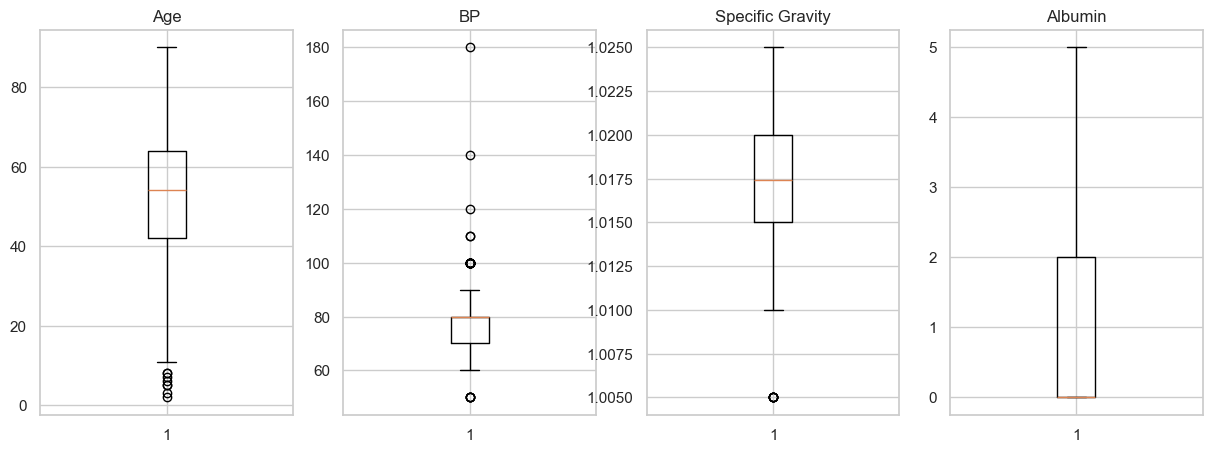

In [62]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.boxplot(df['age'])
plt.title("Age")


plt.subplot(1,4,2)
plt.boxplot(df['bp'])
plt.title("BP")

plt.subplot(1,4,3)
plt.boxplot(df['sg'])
plt.title("Specific Gravity")

plt.subplot(1,4,4)
plt.boxplot(df['al'])
plt.title("Albumin")

plt.show()

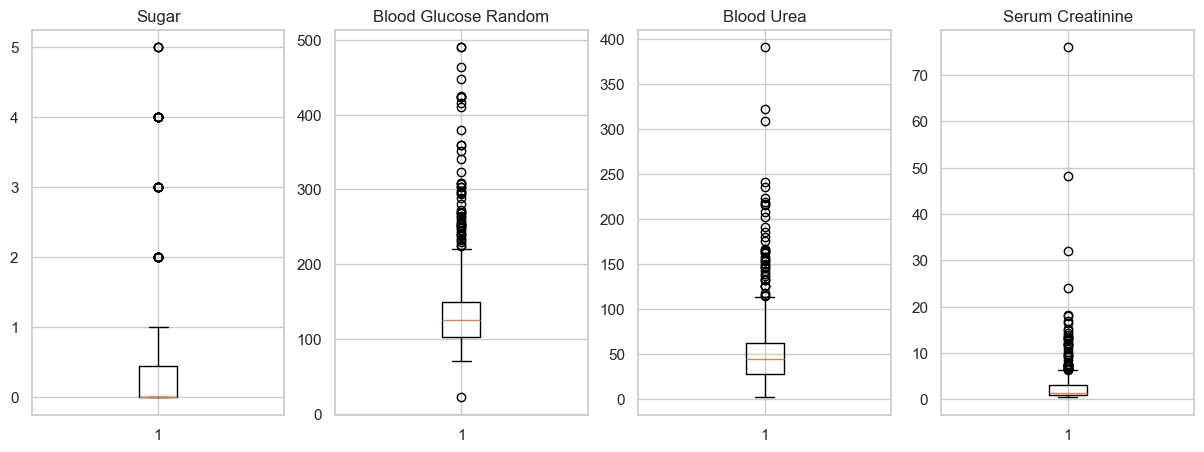

In [63]:
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.boxplot(df['su'])
plt.title("Sugar")


plt.subplot(1,4,2)
plt.boxplot(df['bgr'])
plt.title("Blood Glucose Random")

plt.subplot(1,4,3)
plt.boxplot(df['bu'])
plt.title("Blood Urea")

plt.subplot(1,4,4)
plt.boxplot(df['sc'])
plt.title("Serum Creatinine")

plt.show()

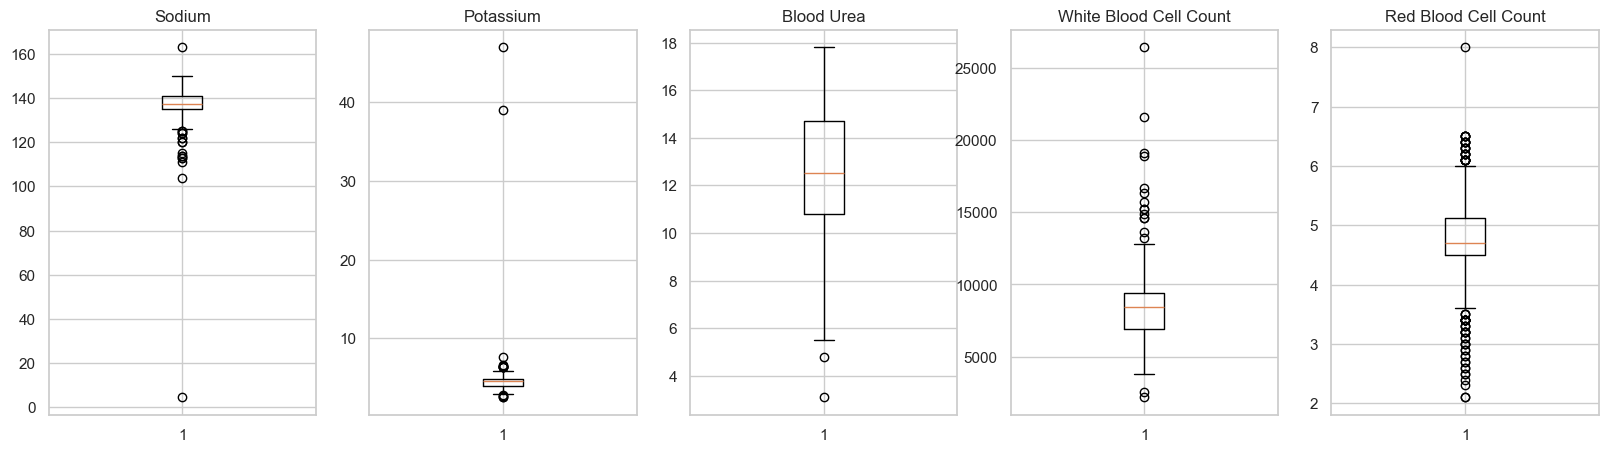

In [64]:
plt.figure(figsize=(20,5))

plt.subplot(1,5,1)
plt.boxplot(df['sod'])
plt.title("Sodium")


plt.subplot(1,5,2)
plt.boxplot(df['pot'])
plt.title("Potassium")

plt.subplot(1,5,3)
plt.boxplot(df['hemo'])
plt.title("Blood Urea")

plt.subplot(1,5,4)
plt.boxplot(df['wc'])
plt.title("White Blood Cell Count")

plt.subplot(1,5,5)
plt.boxplot(df['rc'])
plt.title("Red Blood Cell Count")

plt.show()

C:\Users\nithi\AppData\Local\Temp\ipykernel_15956\3277918827.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['wc'])
C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='wc', ylabel='Density'>

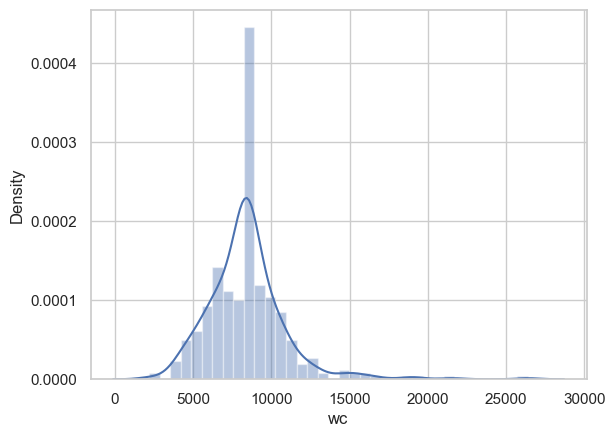

In [65]:
sns.distplot(df['wc'])

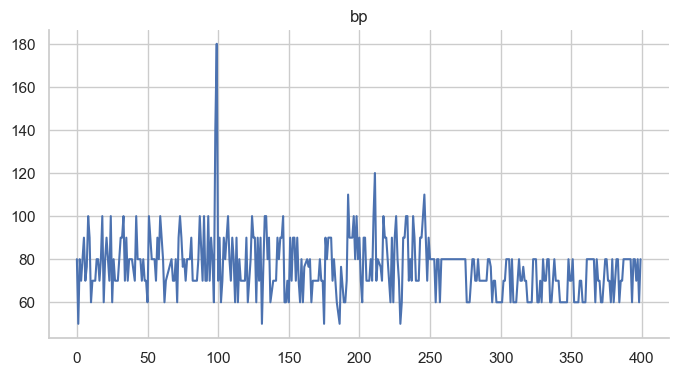

In [66]:
df['bp'].plot(kind='line', figsize=(8, 4), title='bp')
plt.gca().spines[['top', 'right']].set_visible(False)

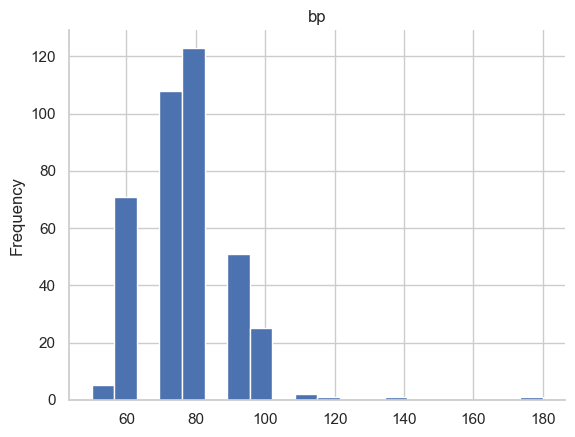

In [67]:
df['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

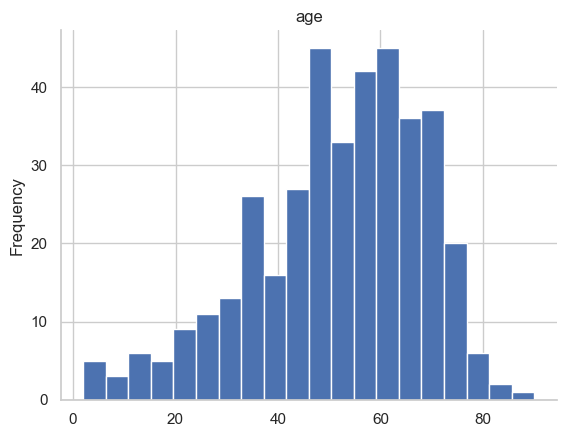

In [68]:
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [69]:
df['classification'].value_counts()

classification
ckd       236
notckd    150
ckd\t       2
Name: count, dtype: int64

 removing the unwanted value from the feature

In [70]:
df=df[df['classification']!='ckd\t']

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
df['pcv']=df['pcv'].astype('int64')
## converting pcv feature into integer

le=LabelEncoder()
cat_col=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat_col.append(i)
for i in cat_col:
  df[i]=le.fit_transform(df[i])


 converting catagorical value into numeric values
    
 the above cat_col converts the object values into numeric values which can be used for the project

In [73]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38,6000,4.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31,7500,4.7,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35,7300,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47,6700,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54,7800,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49,6600,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51,7200,5.9,0,0,0,0,0,0,1


In [74]:
previous_values=pd.DataFrame(df['classification'].value_counts())
previous_values.reset_index(inplace=True)
previous_values

## storing all the values of classification in variable 

,classification,count
0,0,236
1,1,150


<Axes: xlabel='classification', ylabel='count'>

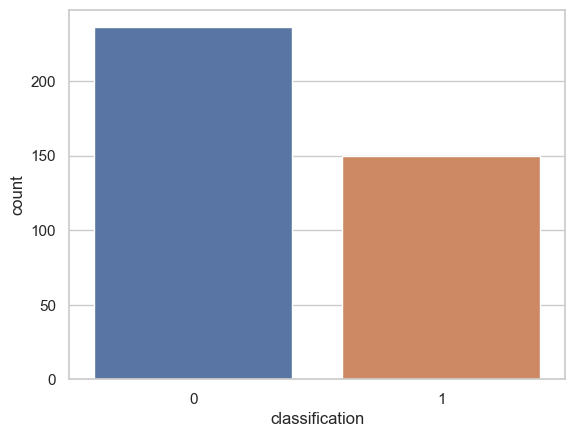

In [75]:
sns.barplot(data=previous_values,x=previous_values['classification'],y=previous_values['count'])

## visualizing the values of classification using the bar plot

 we can see that there are no equal amount of values which is imbalanced which is baised model and accuracy less
 
 To make class balance i used smote synthetic minority over sampling tecqnique
 
 this smote makes the data value equal which can be more accurate 
 
 minority means it takes the least values and add the values to it to make it equal

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
smt=SMOTE(sampling_strategy='minority')

Creating synthetic data 

In [78]:
X=df.drop("classification",axis=1)
Y=df['classification']
x_sm,y_sm=smt.fit_resample(X,Y)


<Axes: xlabel='classification', ylabel='count'>

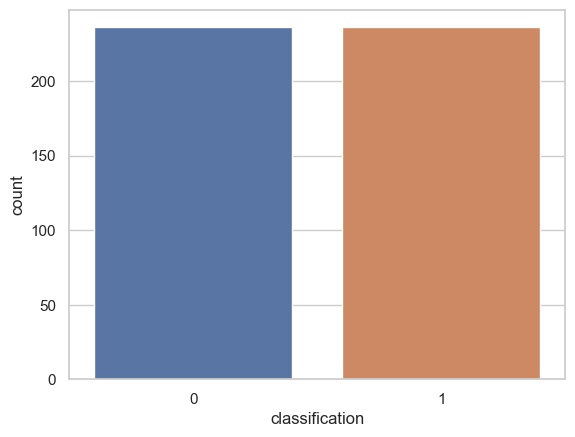

In [79]:
## balanced class now the values are equal and it is visualized using bar plot

new_values=pd.DataFrame(y_sm.value_counts())
new_values.reset_index(inplace=True)
sns.barplot(data=new_values,x=new_values['classification'],y=new_values['count'])

In [80]:
new_df=x_sm
new_df['classification']=y_sm
## creating new data set with the new values

In [81]:
new_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.000000,80.000000,1.020000,1.000000,0.000000,1,1,0,0,121.000000,...,44,7800,5.200000,1,1,0,0,0,0,0
1,7.000000,50.000000,1.020000,4.000000,0.000000,1,1,0,0,148.036517,...,38,6000,4.700000,0,0,0,0,0,0,0
2,62.000000,80.000000,1.010000,2.000000,3.000000,1,1,0,0,423.000000,...,31,7500,4.700000,0,1,0,1,0,1,0
3,48.000000,70.000000,1.005000,4.000000,0.000000,1,0,1,0,117.000000,...,32,6700,3.900000,1,0,0,1,1,1,0
4,51.000000,80.000000,1.010000,2.000000,0.000000,1,1,0,0,106.000000,...,35,7300,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,53.317059,72.754671,1.023623,0.000000,0.000000,1,1,0,0,97.365883,...,49,9100,5.200000,0,0,0,0,0,0,1
468,19.307689,80.000000,1.019975,0.009633,0.004264,1,1,0,0,106.933695,...,44,8420,4.701894,0,0,0,0,0,0,1
469,30.915287,60.000000,1.025000,0.000000,0.000000,1,1,0,0,83.221829,...,46,7818,5.346375,0,0,0,0,0,0,1
470,50.507521,80.000000,1.020000,0.000000,0.000000,1,1,0,0,115.176590,...,45,9500,5.513538,0,0,0,0,0,0,1


# Correlation between features and features with treatment

* Correlation analysis: A statistical technique used to measure the strength and direction of the relationship between two variables.

<Axes: >

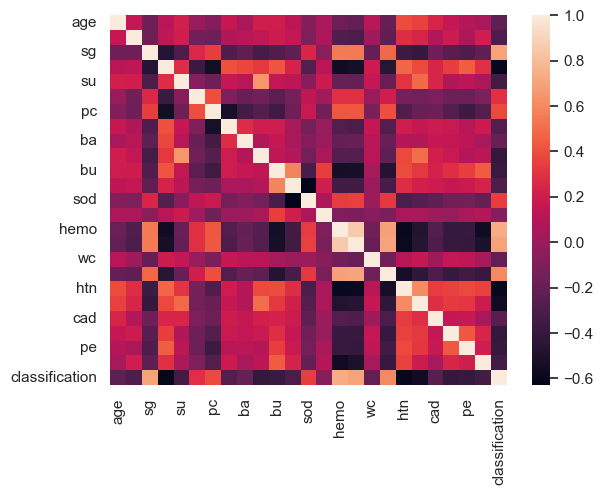

In [82]:
sns.heatmap(df.corr())

## Task 5 – A First Impression
## Task 6 – Nested Cross Validation

 importing all required libraries for further process

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

 taking 5 splits which is used for cross validation

In [84]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True)
accuracies = []

In [85]:
X=new_df.drop('classification',axis=1)
Y=new_df['classification']

 dividing dataset for training and testing 80% for training 20% for testing

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [87]:
len(X_train),len(X_test)

(377, 95)

Logistic regression is a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation.

using this model for making first impression

In [88]:
lr1=LogisticRegression()
lr1.fit(X_train,y_train)
pred_lr1=lr1.predict(X_test)
print(accuracy_score(pred_lr1,y_test))
print(classification_report(pred_lr1,y_test))

0.9263157894736842
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        44
           1       0.96      0.90      0.93        51

    accuracy                           0.93        95
   macro avg       0.93      0.93      0.93        95
weighted avg       0.93      0.93      0.93        95



C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds.

cross validation for logistic regression method

In [89]:
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    lr1 = LogisticRegression()
    lr1.fit(X_train_fold, y_train_fold)
    y_pred = lr1.predict(X_val_fold)
    v_accuracy_lr1 = accuracy_score(y_val_fold, y_pred)
    accuracies.append(v_accuracy_lr1)

for i, accuracy in enumerate(accuracies):
    print(f"Fold {i+1} Accuracy: {accuracy}")

print(f"Accuracy after {n_splits}-fold cross-validation: {np.mean(accuracies)}")

C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fold 1 Accuracy: 0.9342105263157895
Fold 2 Accuracy: 0.9210526315789473
Fold 3 Accuracy: 0.92
Fold 4 Accuracy: 0.9066666666666666
Fold 5 Accuracy: 0.92
Accuracy after 5-fold cross-validation: 0.9203859649122806


C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

using svm method

In [90]:
svm1=SVC()
svm1.fit(X_train,y_train)
pred_svm1=svm1.predict(X_test)
print(accuracy_score(pred_svm1,y_test))
print(classification_report(pred_svm1,y_test))

0.6631578947368421
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        51
           1       0.62      0.68      0.65        44

    accuracy                           0.66        95
   macro avg       0.66      0.66      0.66        95
weighted avg       0.67      0.66      0.66        95



cross validation for svm

In [91]:
accuracies = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    svm = SVC()
    svm.fit(X_train_fold, y_train_fold)
    y_pred = svm.predict(X_val_fold)
    v_accuracy_svm = accuracy_score(y_val_fold, y_pred)
    accuracies.append(v_accuracy_svm)

for i, accuracy in enumerate(accuracies):
    print(f"Fold {i+1} Accuracy: {accuracy}")

print(f"Accuracy after {n_splits}-fold cross-validation: {np.mean(accuracies)}")

Fold 1 Accuracy: 0.6973684210526315
Fold 2 Accuracy: 0.5394736842105263
Fold 3 Accuracy: 0.6933333333333334
Fold 4 Accuracy: 0.48
Fold 5 Accuracy: 0.6533333333333333
Accuracy after 5-fold cross-validation: 0.612701754385965


Decision trees in machine learning provide an effective method for making decisions because they lay out the problem and all the possible outcomes

using decison tree classifier

In [92]:
DT1=DecisionTreeClassifier()
DT1.fit(X_train,y_train)
pred_DT1=DT1.predict(X_test)
print(accuracy_score(pred_DT1,y_test))
print(classification_report(pred_DT1,y_test))

0.9578947368421052
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.96      0.96      0.96        48

    accuracy                           0.96        95
   macro avg       0.96      0.96      0.96        95
weighted avg       0.96      0.96      0.96        95



cross validation for decision tree classifer

In [93]:
accuracies = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    dt = DecisionTreeClassifier()
    dt.fit(X_train_fold, y_train_fold)
    y_pred = dt.predict(X_val_fold)
    v_accuracy_dt = accuracy_score(y_val_fold, y_pred)
    accuracies.append(v_accuracy_dt)

for i, accuracy in enumerate(accuracies):
    print(f"Fold {i+1} Accuracy: {accuracy}")

print(f"Accuracy after {n_splits}-fold cross-validation: {np.mean(accuracies)}")

Fold 1 Accuracy: 0.9605263157894737
Fold 2 Accuracy: 0.9736842105263158
Fold 3 Accuracy: 0.9333333333333333
Fold 4 Accuracy: 0.9733333333333334
Fold 5 Accuracy: 1.0
Accuracy after 5-fold cross-validation: 0.9681754385964914


Random forest is a machine learning algorithm that creates an ensemble of multiple decision trees to reach a singular, more accurate prediction or result.

using random forest classifer

In [94]:
rf1=RandomForestClassifier()
rf1.fit(X_train,y_train)
pred_rf1=rf1.predict(X_test)
print(accuracy_score(pred_rf1,y_test))
print(classification_report(pred_rf1,y_test))

0.9894736842105263
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        49

    accuracy                           0.99        95
   macro avg       0.99      0.99      0.99        95
weighted avg       0.99      0.99      0.99        95



cross validation for random forest classifier

In [95]:
accuracies = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    rf = RandomForestClassifier()
    rf.fit(X_train_fold, y_train_fold)
    y_pred = rf.predict(X_val_fold)
    v_accuracy_rf = accuracy_score(y_val_fold, y_pred)
    accuracies.append(v_accuracy_rf)

for i, accuracy in enumerate(accuracies):
    print(f"Fold {i+1} Accuracy: {accuracy}")

print(f"Accuracy after {n_splits}-fold cross-validation: {np.mean(accuracies)}")

Fold 1 Accuracy: 1.0
Fold 2 Accuracy: 1.0
Fold 3 Accuracy: 0.9866666666666667
Fold 4 Accuracy: 0.9866666666666667
Fold 5 Accuracy: 1.0
Accuracy after 5-fold cross-validation: 0.9946666666666667


The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

using KNeighbors classsifier

In [96]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(accuracy_score(pred_knn,y_test))
print(classification_report(pred_knn,y_test))

0.8
              precision    recall  f1-score   support

           0       0.64      0.94      0.76        32
           1       0.96      0.73      0.83        63

    accuracy                           0.80        95
   macro avg       0.80      0.83      0.79        95
weighted avg       0.85      0.80      0.81        95



cross validation for KNeighbors classifier

In [97]:
accuracies = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    knn = SVC()
    knn.fit(X_train_fold, y_train_fold)
    y_pred = knn.predict(X_val_fold)
    v_accuracy_knn = accuracy_score(y_val_fold, y_pred)
    accuracies.append(v_accuracy_knn)

for i, accuracy in enumerate(accuracies):
    print(f"Fold {i+1} Accuracy: {accuracy}")

print(f"Accuracy after {n_splits}-fold cross-validation: {np.mean(accuracies)}")

Fold 1 Accuracy: 0.618421052631579
Fold 2 Accuracy: 0.4868421052631579
Fold 3 Accuracy: 0.6933333333333334
Fold 4 Accuracy: 0.6666666666666666
Fold 5 Accuracy: 0.6933333333333334
Accuracy after 5-fold cross-validation: 0.6317192982456141


The Naïve Bayes classifier is a supervised machine learning algorithm that is used for classification tasks such as text classification

In [98]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)
pred_GNB=GNB.predict(X_test)
print(accuracy_score(pred_GNB,y_test))
print(classification_report(pred_GNB,y_test))

0.9578947368421052
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.92      0.96        52

    accuracy                           0.96        95
   macro avg       0.96      0.96      0.96        95
weighted avg       0.96      0.96      0.96        95



cross validation for navie bayes classifier

In [99]:
accuracies = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    nb = SVC()
    nb.fit(X_train_fold, y_train_fold)
    y_pred = nb.predict(X_val_fold)
    v_accuracy_nb = accuracy_score(y_val_fold, y_pred)
    accuracies.append(v_accuracy_nb)

for i, accuracy in enumerate(accuracies):
    print(f"Fold {i+1} Accuracy: {accuracy}")

print(f"Accuracy after {n_splits}-fold cross-validation: {np.mean(accuracies)}")

Fold 1 Accuracy: 0.5263157894736842
Fold 2 Accuracy: 0.5789473684210527
Fold 3 Accuracy: 0.6
Fold 4 Accuracy: 0.7066666666666667
Fold 5 Accuracy: 0.64
Accuracy after 5-fold cross-validation: 0.6103859649122807


I have used 6 methods and checked which method gives me the accurate prediction

Storing all the accuracy values in a new dataframe to compare

In [100]:
results_df={"Logistic Regression":[accuracy_score(pred_lr1,y_test)],"SVM":[accuracy_score(pred_svm1,y_test)],
            "Decision Tree":[accuracy_score(pred_DT1,y_test)],"Random Forest":[accuracy_score(pred_rf1,y_test)],"KNN":[accuracy_score(pred_knn,y_test)],
           "Naive Bayes":[accuracy_score(pred_GNB,y_test)]}
results_df=pd.DataFrame(results_df)
results_df

,Logistic Regression,SVM,Decision Tree,Random Forest,KNN,Naive Bayes
0,0.926316,0.663158,0.957895,0.989474,0.8,0.957895


we can see random forest and naive bayes rule are giving more accurate prediction 

storing all the values of all classification methods in the dataframe

In [101]:
results_df={"Algorithms":["Logistic Regression","SVM","Decision Tree","Random Forest","KNN",'Naive Bayes'],"Accuracy":[accuracy_score(pred_lr1,y_test),accuracy_score(pred_svm1,y_test),accuracy_score(pred_DT1,y_test),accuracy_score(pred_rf1,y_test),accuracy_score(pred_knn,y_test),accuracy_score(pred_GNB,y_test)],
           "Recall":[recall_score(pred_lr1,y_test),recall_score(pred_svm1,y_test),recall_score(pred_DT1,y_test),recall_score(pred_rf1,y_test),recall_score(pred_knn,y_test),recall_score(pred_GNB,y_test)],
           "Precision":[precision_score(pred_lr1,y_test),precision_score(pred_svm1,y_test),precision_score(pred_DT1,y_test),precision_score(pred_rf1,y_test),precision_score(pred_knn,y_test),precision_score(pred_GNB,y_test)],
           "F1-Score":[f1_score(pred_lr1,y_test),f1_score(pred_svm1,y_test),f1_score(pred_DT1,y_test),f1_score(pred_rf1,y_test),f1_score(pred_knn,y_test),f1_score(pred_GNB,y_test)]}
            
results_df=pd.DataFrame(results_df)
results_df

,Algorithms,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.926316,0.901961,0.958333,0.929293
1,SVM,0.663158,0.681818,0.625000,0.652174
2,Decision Tree,0.957895,0.958333,0.958333,0.958333
3,Random Forest,0.989474,0.979592,1.000000,0.989691
4,KNN,0.800000,0.730159,0.958333,0.828829
5,Naive Bayes,0.957895,0.923077,1.000000,0.960000


When we compare recall,precision,f1 score we can conclude that random forest classifier is best

The best model for the prediction is Random Forest

RandomForest Classifier will give a better performance in classification if the available training data is small, 

Naive Bayes will perform better for larger test sample size

As the data set is small,random forest classification  is the best model

In [102]:
import joblib

Storing the random forest method in pkl with final_model name

In [103]:
joblib.dump(rf1,"Final_Model.pkl")

['Final_Model.pkl']

## Task 7 – Analysis of the Final Model

Final Testing

In [104]:
Final_model=joblib.load("Final_Model.pkl")

In [105]:
# dict1={'age':,'bp':,'sg':,'al':,'su':,'rbc':,'pc':,'pcc':,'ba':,'bgr':,'bu':,'sc':,'sod':,'pot':,'hemo':,'pcv':,'wc':,'rc':,'htn':,'dm':,'cad':,'appet':,'pe':,'ane':}
# test=pd.DataFrame(dict1)
# Final_model.predict(test)

we can enter the values in this model which gives us the prediction for chronic kidney disease

In [106]:
final=results_df

ploting all the acccuracy,precision, recall and f1 score of all algorithms

C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

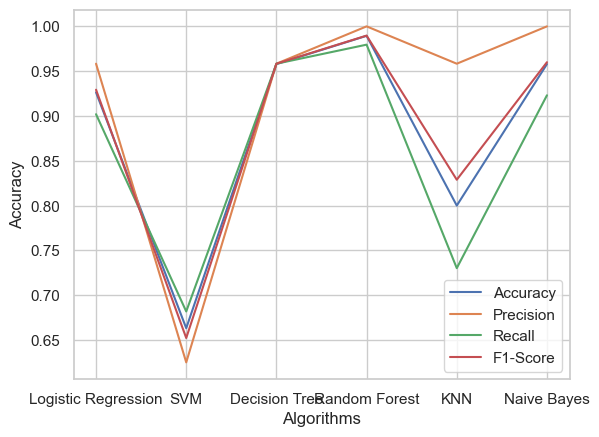

In [107]:
sns.lineplot(y=final['Accuracy'], x=final['Algorithms'], label='Accuracy')

sns.lineplot(y=final['Precision'], x=final['Algorithms'], label='Precision')

sns.lineplot(y=final['Recall'], x=final['Algorithms'], label='Recall')

sns.lineplot(y=final['F1-Score'], x=final['Algorithms'], label='F1-Score')

plt.legend()

C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'KNN'),
  Text(5, 0, 'Naive Bayes')])

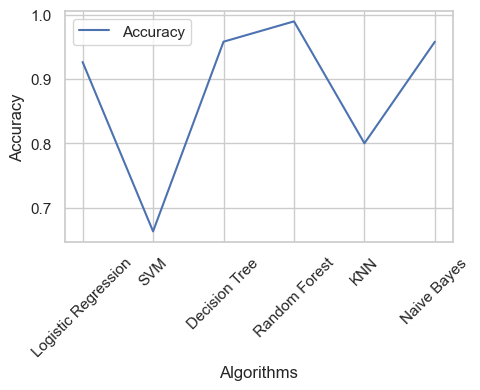

In [108]:
plt.figure(figsize=(5,3))
sns.lineplot(y=final['Accuracy'], x=final['Algorithms'], label='Accuracy')
plt.xticks(rotation=45)

C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'KNN'),
  Text(5, 0, 'Naive Bayes')])

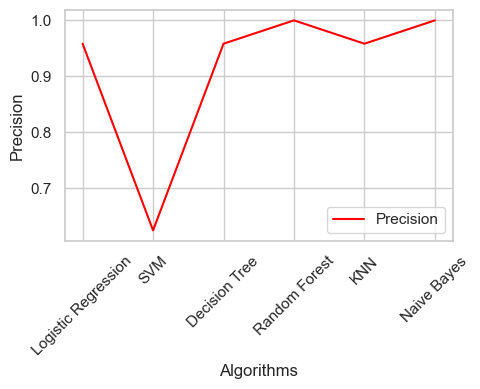

In [109]:
plt.figure(figsize=(5,3))
sns.lineplot(y=final['Precision'], x=final['Algorithms'], label='Precision',color='red')
plt.xticks(rotation=45)

C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'KNN'),
  Text(5, 0, 'Naive Bayes')])

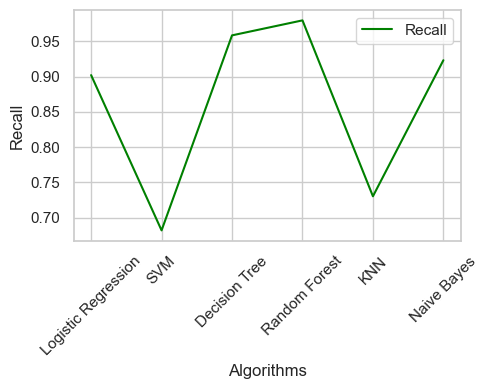

In [110]:
plt.figure(figsize=(5,3))
sns.lineplot(y=final['Recall'], x=final['Algorithms'], label='Recall',color='green')
plt.xticks(rotation=45)

C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'KNN'),
  Text(5, 0, 'Naive Bayes')])

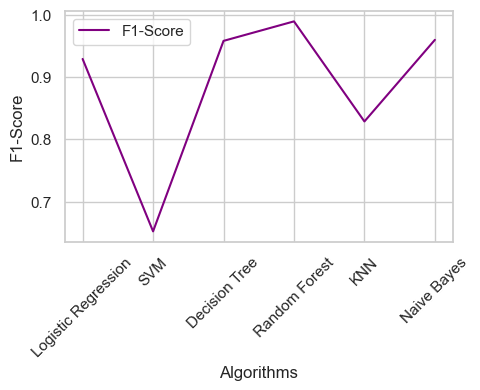

In [111]:
plt.figure(figsize=(5,3))
sns.lineplot(y=final['F1-Score'], x=final['Algorithms'], label='F1-Score',color='purple')
plt.xticks(rotation=45)

## Task 8 – Feature Importance

Feature permutation is a technique used to assess the importance of each feature in a model by measuring the decrease in model performance when the values of a feature are randomly shuffled

In [112]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [113]:
from sklearn.inspection import permutation_importance

# Performing feature permutation
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Summarizing feature importance
feature_names = X.columns
perm_df = pd.DataFrame({'feature': feature_names,
                        'importance_mean': perm_importance.importances_mean,
                        'importance_std': perm_importance.importances_std})

perm_df = perm_df.sort_values(by='importance_mean', ascending=False)


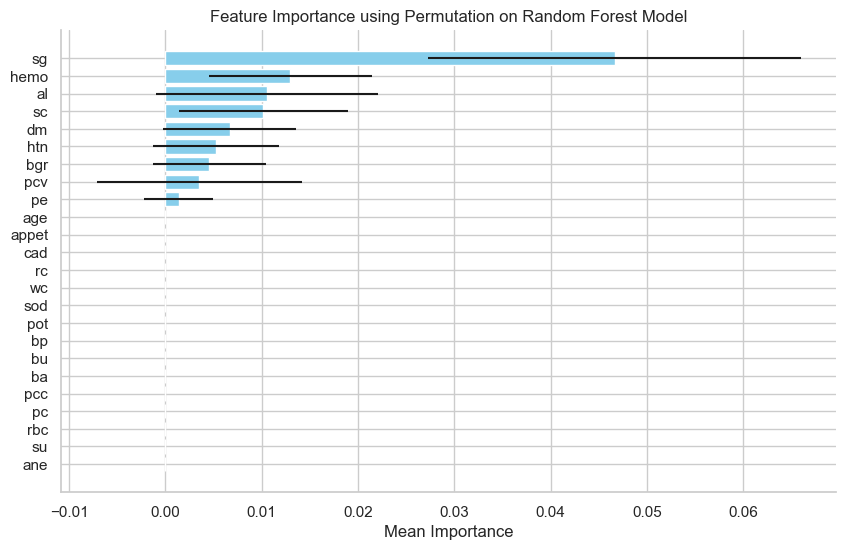

In [114]:
#  Plot feature importances in a suitable diagram

plt.figure(figsize=(10, 6))
plt.barh(perm_df['feature'], perm_df['importance_mean'], xerr=perm_df['importance_std'], color='skyblue')
plt.xlabel('Mean Importance')
plt.title('Feature Importance using Permutation on Random Forest Model')
plt.gca().invert_yaxis()  # To have the highest importance on top
plt.gca().spines[['top', 'right']].set_visible(False)


plt.show()



In [115]:
# Displaying the sorted feature importances
perm_df

,feature,importance_mean,importance_std
2,sg,0.046667,0.019349
14,hemo,0.012982,0.008458
3,al,0.010526,0.011531
11,sc,0.010175,0.008800
19,dm,0.006667,0.006920
18,htn,0.005263,0.006517
9,bgr,0.004561,0.005882
15,pcv,0.003509,0.010643
22,pe,0.001404,0.003578
0,age,0.000000,0.000000


## Task 9 – Conclusions and Future Work



## 1. Summarize and interpret the achieved results.

The primary goal of this project was to develop a classification model to predict Chronic Kidney Disease based on patients'     medical and lifestyle data. 

  By leveraging a Random Forest classifier, we achieved a robust and interpretable mode.
  
  This model can effectively support early detection efforts, potentially improving patient outcomes and reducing healthcare costs.
  
  Through permutation importance analysis, we identified the most critical features for predicting CKD. Features such as serum creatinine, glomerular filtration rate (GFR), and blood pressure were among the top contributors

## 2. Critically reflect and assess the usability of the applied methodology in the context of your task (Task 1).

The Random Forest algorithm was an appropriate choice due to its ability to handle complex interactions between features and provide feature importance insights.

While i used median and mode imputation for missing values, more sophisticated techniques such as K-Nearest Neighbors (KNN) imputation or multiple imputation could potentially improve the data quality and model performance

## 3. Explain the generated value within the context of your task.

The implementation of this classification model generates significant value for HealthLife:

Early Detection and Intervention

Improved Patient Outcomes

Cost Savings

Data-Driven Insights

## 4. Explain limitations and pitfalls and critically discuss the employed methodology (your choices as well as the choices given in these tasks). What could or even should have been done differently?


The dataset's quality and representativeness are crucial. If the data is biased or unrepresentative of the broader patient population, the model's predictions may not generalize well.

The imputation methods used for handling missing values were basic. More sophisticated techniques could provide better estimates, reducing the risk of introducing bias.

While Random Forests are interpretable to some extent, more transparent models like logistic regression could be considered for greater interpretability, especially in a healthcare context where explainability is vital.

More extensive hyperparameter tuning could further optimize the model's performance. Techniques like Grid Search or Bayesian Optimization could be employed for this purpose.


## 5. Propose ideas for future work (a short sketch or enumeration of ideas is sufficient, no further experiments). The ideas should not be too general (e.g., “try further algorithms”) but be specific to the project (e.g., “try Algorithm X, as because of Property Y, it might work specifically well on this dataset”).

Implementing advanced imputation techniques such as KNN imputation, multiple imputation, or even machine learning-based imputation to handle missing values more effectively.

developing a real-time prediction system integrated into HealthLife's clinical decision support system, allowing healthcare providers to input patient data and receive immediate CKD risk assessments.

using ensemble methods beyond Random Forest, such as Gradient Boosting Machines (GBM) or Extreme Gradient Boosting (XGBoost), which might improve predictive performance.


<div class="alert alert-block alert-warning">
<b>End of notebook</b> 
</div>